# Import dataset

In [1]:
import csv

In [2]:
file = open("raw_data.txt", "r")

In [3]:
datas = file.read().split("\n")

# Cleaning dataset

## Add header to file

In [5]:
with open("clean_data.csv", "w", encoding="utf8", newline ="") as file_csv:
	header = ["sbd", "tên", "dd", "mm", "yy", "toán", "ngữ văn", "khxh", "khtn", "lịch sử", "địa lí", "gdcd", "sinh học", "vật lí", "hóa học", "tiếng anh"]
	writer = csv.writer(file_csv)
	writer.writerow(header)

## Cleaning process

In [ ]:
sbd = 2000000
for data in datas:
    sbd += 1
    if sbd in [2000521,2002776,2002833,2005380,2005472,2005733,2005820,2005876,2006091,2006300,2006364,2006544,2006712,2006720,2006904,2008746,2009196,2012503,2019593,2020755,2024536,2027212,2031588,2031948,2035434,2036693,2042067,2042972,2043577,2044668,2046177,2046483,2046496,2046651,2046766,2046771,2046788,2046810,2046841,2046998,2047031,2047122,2047241,2047273,2047304,2047486,2047636,2047834,2047843,2047856,2047865,2048225,2048271,2048279,2048397,2048424,2048427,2048592,2048660,2048701,2048723,2048858,2049069,2049090,2049104,2049164,2049234,2049312,2049383,2049663,2049763,2049775,2049891,2049971,2050378,2050476,2050488,2050516,2050526,2050540,2050576,2050642,2050649,2050722,2050809,2050814,2050899,2050959,2050978,2050984,2050985,2051006,2051072,2051181,2051191,2051234,2051422,2051468,2051472,2051495,2051615,2051616,2051736,2052013,2052030,2052089,2052314,2052373,2052591,2052663,2052711,2052791,2052856,2053000,2053106,2053259,2053593,2053699,2053860,2054235,2054306,2054374,2054508,2054733,2054787,2055119,2055200,2055290,2055296,2055606,2055683,2055803,2055829,2055912,2055930,2055986,2056020,2056032,2056105,2056139,2056186,2056190,2056238,2056273,2056291,2056298,2056333,2056350,2056377,2056393,2056782,2056823,2056865,2056871,2057014,2057294,2057410,2057496,2058404,2058498,2058518,2058789,2058938,2059095,2059163,2059740,2059751,2059769,2059774,2059807,2059852,2060462,2060492,2060536,2060610,2060652,2060656,2060660,2060730,2060738,2061813,2062212,2062236,2062391,2062440,2062898,2063109,2063114,2063179,2063180,2063181,2063207,2063272,2063653,2063707,2063716,2063752,2063754,2063825,2064369,2064704,2064783,2064990,2065104,2065323,2065604,2065877,2065995,2066106,2066212,2066835,2067172,2067291,2067316,2067371,2067383,2067401,2067446,2067467,2067550,2067563,2067659,2067672,2067698,2067762,2067909,2067971,2067996,2068089,2068119,2068156,2068174,2068178,2068243,2068287,2068365,2068382,2068427,2068453,2068548,2068550,2068627,2068667,2068702,2068732,2068846,2068970,2069028,2069043,2069066,2069156,2069290,2069362,2069397,2069843,2069990,2070203,2070870,2071102,2071574,2072480,2072549,2072755,2072823,2073036,2073372,2073477,2073556,2073964,2074135,2074254,2074281,2074367,2074607,2074719]:
        continue
    sbd_str = "0" + str(sbd)

    # make data becomes a list
    data = data.split("\\n")

    # remove \r and \t
    for i in range(len(data)):
        data[i] = data[i].replace("\\r","")
        data[i] = data[i].replace("\\t","")


    # remove tags
    for i in range(len(data)):
        tags = []
        for j in range(len(data[i])):
            if data[i][j] == "<":
                begin =  j
            if data[i][j] == ">":
                end = j
                tags.append(data[i][begin:end+1])
        for tag in tags:
            data[i] = data[i].replace(tag,"") 

    # remove leading whitespace
    for i in range(len(data)):
        data[i] = data[i].strip()

    # remove empty line
    emty_line =  [] 
    for i in range(len(data)):
        if data[i] != "":
            emty_line.append(data[i])
    data = emty_line

    # choose relevant information
    name = data[7]
    dob = data[8]
    scores = data[9]


    # load unicode table
    chars = []
    codes = []
    file = open("unicode.txt", "r",encoding="utf8")
    unicode_table = file.read().split("\n")

    for code in unicode_table:
        x = code.split(" ")
        chars.append(x[0])
        codes.append(x[1])


    # replace special characters in name and scores
    for i in range(len(chars)):
        name = name.replace(codes[i],chars[i])
        scores = scores.replace(codes[i],chars[i])


    # replace web code to character in name
    for i in range(len(name)):
        if name[i:i+2] == "&#":
            name = name[:i] +chr(int(name[i+2:i+5])) + name[i+6:]


    # replace web code to character in scores
    for i in range(len(scores)):
        if scores[i:i+2] == "&#":
            scores = scores[:i] +chr(int(scores[i+2:i+5])) + scores[i+6:]


    # change to lower case
    name = name.lower()
    scores = scores.lower()


    # split dob
    dob_list = dob.split("/")
    dd = int(dob_list[0])
    mm = int(dob_list[1])
    yy = int(dob_list[2])

    # process scores
    # remove :
    scores = scores.replace(":", "")
    scores = scores.replace("khxh ", "khxh   ") 
    scores = scores.replace("khtn ", "khtn   ") 
    scores_list = scores.split("   ")

    data = [sbd_str,name.title(),str(dd), str(mm), str(yy)]

    # add score to data
    for subject in ["toán", "ngữ văn", "khxh", "khtn", "lịch sử", "địa lí", "gdcd", "sinh học", "vật lí", "hóa học", "tiếng anh"]:
        if subject in scores_list:
            subject_name_position = scores_list.index(subject)
            subject_score_position = subject_name_position + 1
            subject_score = scores_list[subject_score_position]
            data.append(str(subject_score))
        else:
            data.append("-1")


    # write data to test.txt
    with open("clean_data.csv", "a", encoding="utf8",newline ="") as file_csv:
        writer = csv.writer(file_csv)
        writer.writerow(data)

# Visualization

## Top first_name

In [16]:
# read file
with open("clean_data.csv","r", encoding ="utf8") as file:
    data = file.read().split("\n")

header = data[0]
students = data[1:] 

#split each student in list
for i in range(len(students)):
    students[i] = students[i].split(",")

students.pop()

name = []
name_count = []

for student in students:
    student_name = student[1].split(" ")
    student_name = student_name[-1]

    if student_name not in name:
        name.append(student_name)
        name_count.append(0)
        name_count[name.index(student_name)] += 1
    else:
        name_count[name.index(student_name)] += 1

#Sorting value name count
counted_max_numer = []
sort_index = []

for i in range(len(name)):
    max_number = 0 
    for j in range(len(name)):
        if name_count[j] > max_number and name_count[j] not in counted_max_numer:
            max_number = name_count[j]
    
    counted_max_numer.append(max_number)

for max_num in counted_max_numer:
    for i in range(len(name)):
        if name_count[i] == max_num and i not in sort_index:
            sort_index.append(i)

name_sorted = []
name_count_sorted = []
for index in sort_index:
    name_sorted.append(name[index])
    name_count_sorted.append(name_count[index])


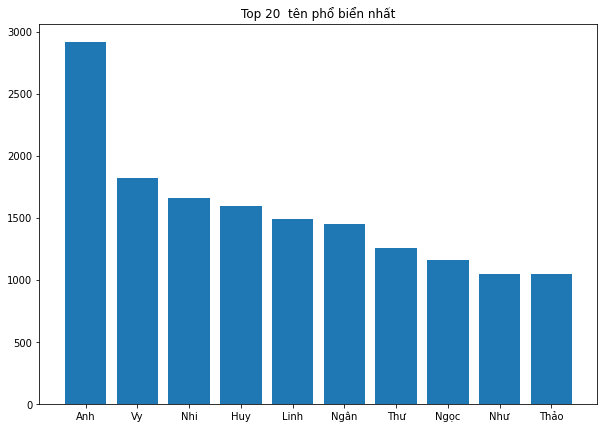

In [17]:
from matplotlib import pyplot as plt
 
name = name_sorted[0:20]
count = name_count_sorted[0:20]
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name[0:10], count[0:10])
 
# Show Plot
plt.title("Top 20 " + ' tên phổ biển nhất')
plt.show()

## Top last name

In [18]:
# read file
with open("clean_data.csv","r", encoding ="utf8") as file:
    data = file.read().split("\n")


header = data[0]
students = data[1:] 

#split each student in list
for i in range(len(students)):
    students[i] = students[i].split(",")

students.pop()

#Get number of student per age group
# 17 18 19 ... 26 >=27
last_name = []
last_name_count = []

for student in students:
    student_name = student[1].split(" ")
    student_last_name = student_name[0]

    if student_last_name not in last_name:
        last_name.append(student_last_name)
        last_name_count.append(0)
        last_name_count[last_name.index(student_last_name)] += 1
    else:
        last_name_count[last_name.index(student_last_name)] += 1

#Sorting value name count
counted_max_numer = []
sort_index = []

for i in range(len(last_name)):
    max_number = 0 
    for j in range(len(last_name)):
        if last_name_count[j] > max_number and last_name_count[j] not in counted_max_numer:
            max_number = last_name_count[j]

    counted_max_numer.append(max_number)

for max_num in counted_max_numer:
    for i in range(len(last_name)):
        if last_name_count[i] == max_num and i not in sort_index:
            sort_index.append(i)

name_sorted = []
name_count_sorted = []
for index in sort_index:
    name_sorted.append(last_name[index])
    name_count_sorted.append(last_name_count[index])

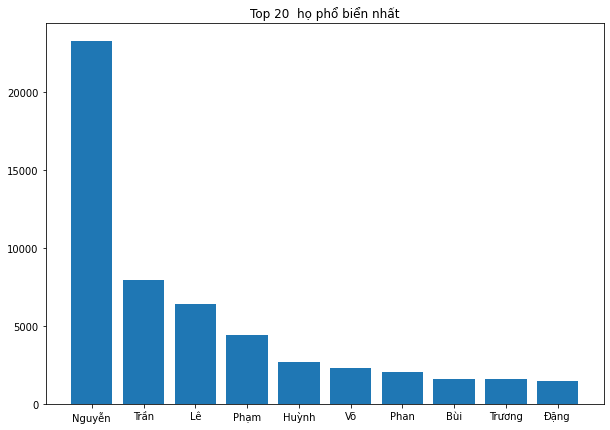

In [19]:
from matplotlib import pyplot as plt
 
name = name_sorted[0:20]
count = name_count_sorted[0:20]
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name[0:10], count[0:10])
 
# Show Plot
plt.title("Top 20 " + ' họ phổ biển nhất')
plt.show()

## Average score based on age groups

In [34]:
# read file
with open("clean_data.csv","r", encoding ="utf8") as file:
    data = file.read().split("\n")


header = data[0]
students = data[1:] 

#split each student in list
for i in range(len(students)):
    students[i] = students[i].split(",")

students.pop()

#Get number of student per age group
# 17 18 19 ... 26 >=27
num_of_student_per_age_group = [0,0,0,0,0,0,0,0,0,0,0]
avg_of_student_per_age_group = [0,0,0,0,0,0,0,0,0,0,0]

for student in students:
    age = 2020 - int(student[4]) 
    if age >= 27:
        age = 27
    num_of_student_per_age_group[age - 17] += 1

    sum_score = 0 #tổng điêrm
    count_score = 0 #số môn thi
    for i in range(11):
        if student[i+5] != "-1":
            count_score += 1
            sum_score += float(student[i+5])
    avg = sum_score/count_score
    avg_of_student_per_age_group[age - 17] += avg

for i in range(len(avg_of_student_per_age_group)):
    avg_of_student_per_age_group[i] = avg_of_student_per_age_group[i]/num_of_student_per_age_group[i]


for i in range(len(avg_of_student_per_age_group)):
    avg_of_student_per_age_group[i] = avg_of_student_per_age_group[i] * 7000

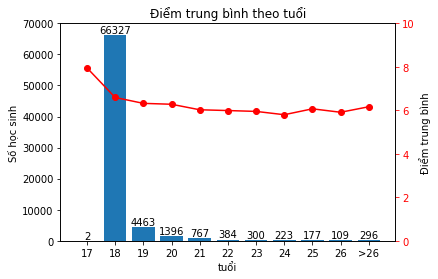

In [35]:
#plot bar chart
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(11)
y = np.arange(11)


fig,axis = plt.subplots()
plt.plot(x, avg_of_student_per_age_group, color ='red', marker = "o")
plt.bar(x, num_of_student_per_age_group, align='center')

age_labels = [17,18,19,20,21,22,23,24,25,26,">26"]

plt.xticks(x, age_labels)

axis.set_ylim(0,70000)
axis.set_ylabel('Số học sinh')
axis.set_xlabel('tuổi')

#right-side tick
axis2 = axis.twinx()
axis2.tick_params("y", colors ='r')
axis2.set_ylabel("Điểm trung bình")
axis2.set_ylim(0,10)

# Make some labels.
rects = axis.patches

labels = [2, 66327, 4463, 1396, 767, 384, 300, 223, 177, 109, 296]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axis.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )


plt.title('Điểm trung bình theo tuổi')
plt.show()

## Average score of students did not take exam ??

In [28]:
# read file
with open("clean_data.csv","r", encoding ="utf8") as file:
    data = file.read().split("\n")


header = data[0]
students = data[1:] 

#split each student in list
for i in range(len(students)):
    students[i] = students[i].split(",")

students.pop()

num_of_exam_taken = [0,0,0,0,0,0,0,0,0,0,0,0]
avg = [0,0,0,0,0,0,0,0,0,0,0,0]


#Number of student who took 0,1,... subjects
for student in students:
    count = 0
    total = 0
#count exam
    for i in range(11):
        if student[i+5] != "-1":
            total += float(student[i+5])
            count += 1

    num_of_exam_taken[count] += 1
    avg[count] += total /count

for i in range(12):
    if avg[i] == 0:
        continue
    avg[i] = round(avg[i]/num_of_exam_taken[i],2)

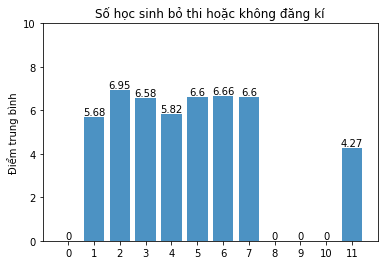

In [29]:
#plot barchart
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(12)
y = np.arange(12)

figure, axis = plt.subplots()


plt.bar(y, avg, align='center', alpha=0.8)
plt.xticks(x,y)

axis.set_ylim(0,10)

plt.ylabel('Điểm trung bình')
plt.title('Số học sinh bỏ thi hoặc không đăng kí')

# Make some labels.
rects = axis.patches

for rect, avg in zip(rects, avg):
    height = rect.get_height()
    axis.text(
        rect.get_x() + rect.get_width() / 2, height, avg, ha="center", va="bottom"
    )
plt.show()


## Numbers of students who did not take an exam

In [36]:
# read file
with open("clean_data.csv","r", encoding ="utf8") as file:
    data = file.read().split("\n")


header = data[0]
students = data[1:]

#remove last student
students.pop()

total_student = len(students)

#split header
header = header.split(",")
subject = header[5:]

#split each student in list
for i in range(total_student):
    students[i] = students[i].split(",")

not_take_exam = [0,0,0,0,0,0,0,0,0,0,0]

#loop through all students:
for student in students:
    for i in range(5,16):
        if student[i] == "-1":
            not_take_exam[i-5] += 1

not_take_exam_percentage = [0,0,0,0,0,0,0,0,0,0,0]

for i in range(0,11):
    not_take_exam_percentage[i] = round(100*not_take_exam[i]/total_student,2)

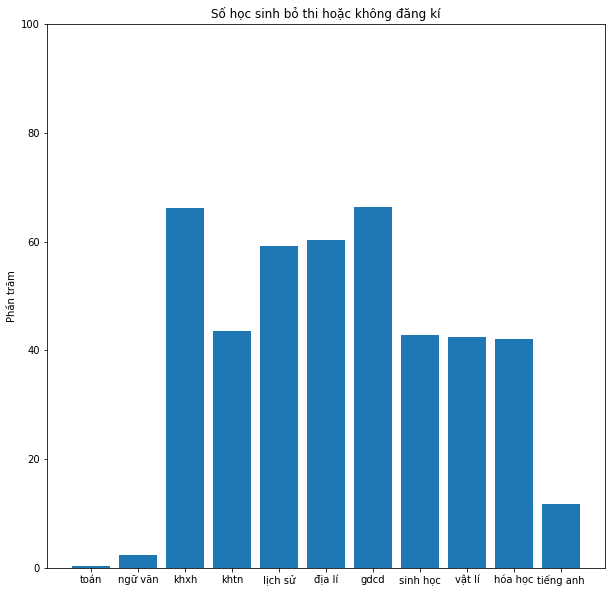

In [37]:
#plot barchart
import matplotlib.pyplot as plt
import numpy as np

figure, axis = plt.subplots(figsize=(10,10))

y_pos = np.arange(len(subject))

plt.bar(y_pos, not_take_exam_percentage, align='center')
plt.xticks(y_pos, subject)

axis.set_ylim(0,100)

plt.ylabel('Phần trăm')
plt.title('Số học sinh bỏ thi hoặc không đăng kí')

plt.show()